In [176]:
#Kalp hastalıklarını tahmin etmek için Logistic Regression kullandım.

In [177]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [178]:
data = pd.read_csv('/Users/bestecetin/Desktop/machine_learning/framingham.csv')

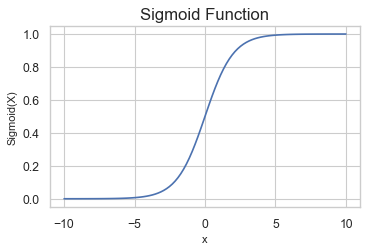

In [179]:
from matplotlib.pyplot import figure
import math
  
figure(figsize=(5, 3), dpi=80)

x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x", fontsize=10)
plt.ylabel("Sigmoid(X)", fontsize=10)
plt.title("Sigmoid Function", fontsize=15)
  
plt.show()

In [180]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [181]:
#önce bir Nan value var mı diye bakalım
data.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [182]:
#true çıkan yerlere fillna kullanarak bir değer atayacağız önce bu değerleri bulmaya çalışalım

In [183]:
data['education'].describe()

count    4133.000000
mean        1.978950
std         1.019791
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [184]:
#Nan değer yerine 1.9'u yuvarlayarak 2 atayalım.
data['education']= data['education'].fillna(2)

In [185]:
#bir kontrol edelim..
data.isnull().education

0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4235    False
4236    False
4237    False
Name: education, Length: 4238, dtype: bool

In [186]:
#artık education'da Nan değeri yok şimdi bunu diğer True Değerleri için yapalım

In [187]:
data['cigsPerDay'].describe()

count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [188]:
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].mean()) #mean değerini kullarak Nanlara değer atama.

In [189]:
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mean())

In [190]:
data['totChol']= data['totChol'].fillna(data['totChol'].mean())

In [191]:
data['BMI']= data['BMI'].fillna(data['BMI'].mean())

In [192]:
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].mean())

In [193]:
data['glucose'] = data['glucose'].fillna(data['glucose'].mean())

In [194]:
data.isnull().any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

In [195]:
#artık hazırız hepsi false...

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

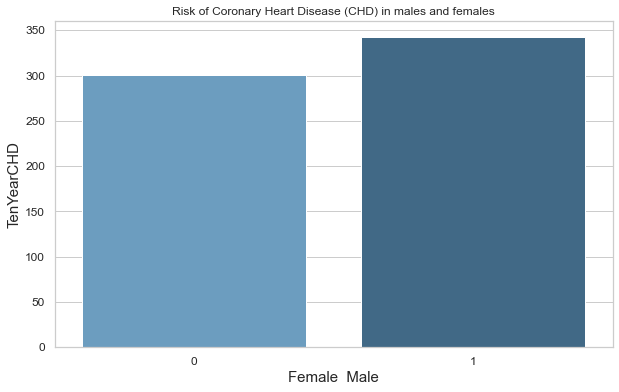

In [196]:
#Hangi cinsiyetin Kalp Hastalığına(CHD) Yakalanma oranı fazlaymış bakalım 
graph= data.groupby("male", as_index=False).TenYearCHD.sum()
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.barplot(x=graph['male'], y= graph['TenYearCHD'], palette="Blues_d")
plt.title('Risk of Coronary Heart Disease (CHD) in males and females')
plt.xlabel('Female  Male', size =15)
plt.ylabel('TenYearCHD', size=15)
plt.xticks(size=12)
plt.yticks(size=12)

In [197]:
#Erkeklerin kalp hastalığına yakalnma oranı daha yüksek görünüyor...

In [198]:
#Hangi yaş grubu daha fazla sigara içiyor bakalım..
graph1= data.groupby("age", as_index=False).currentSmoker.sum()
graph1

,age,currentSmoker
0,32,1
1,33,2
2,34,11
3,35,23
4,36,47
5,37,56
6,38,88
7,39,98
8,40,121
9,41,102


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

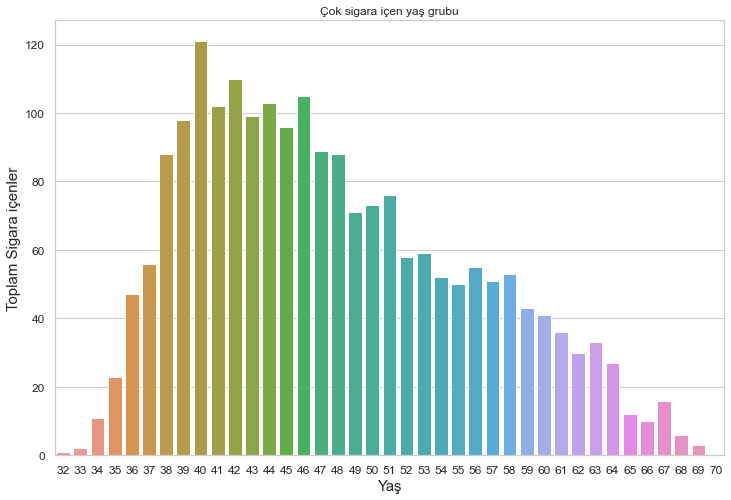

In [199]:
plt.figure(figsize=(12,8))
sns.barplot(x=graph1['age'], y=graph1['currentSmoker'])
plt.title('Çok sigara içen yaş grubu')
plt.xlabel('Yaş', size=15)
plt.ylabel('Toplam Sigara içenler' , size=15)
plt.xticks(size=12)
plt.yticks(size=12)

In [200]:
#orta yaş grubu daha fazla içiyormuş..

In [341]:
x=data.drop(columns='TenYearCHD')
y=data['TenYearCHD']

In [342]:
#Asıl konumuz Logistic Regression'a geçelim.

In [343]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(x,y, test_size = 0.5, random_state = 3)

In [344]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)

In [345]:
logreg.fit(X_train, Y_train)

/Users/bestecetin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [346]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [347]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1797,    6],
       [ 308,    8]])

In [348]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1803
           1       0.57      0.03      0.05       316

    accuracy                           0.85      2119
   macro avg       0.71      0.51      0.48      2119
weighted avg       0.81      0.85      0.79      2119



In [349]:
# logistic regression for multi-class classification using built-in one-vs-rest(OvR)
from sklearn.metrics import accuracy_score, classification_report
# define model
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X_train, Y_train)
# make predictions
prediction=model.predict(x_test)
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, prediction)}")

Test Set Accuracy : 85.181689476168 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1803
           1       0.57      0.03      0.05       316

    accuracy                           0.85      2119
   macro avg       0.71      0.51      0.48      2119
weighted avg       0.81      0.85      0.79      2119



/Users/bestecetin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [329]:
#SVM for multi-class classification using built-in one-vs-one (OvO)
from sklearn.svm import SVC
# define model
model = SVC(decision_function_shape='ovo')
model.fit(X_train, Y_train)
# make predictions
prediction=model.predict(x_test)
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, prediction)}")

Test Set Accuracy : 85.0873053327041 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1803
           1       0.50      0.01      0.01       316

    accuracy                           0.85      2119
   macro avg       0.68      0.50      0.47      2119
weighted avg       0.80      0.85      0.78      2119



In [330]:
model = LogisticRegression(random_state=0, multi_class='multinomial')
model.fit(X_train, Y_train)
# make predictions
prediction=model.predict(x_test)
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, prediction)}")

Test Set Accuracy : 85.32326569136384 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1803
           1       0.65      0.03      0.07       316

    accuracy                           0.85      2119
   macro avg       0.75      0.52      0.49      2119
weighted avg       0.82      0.85      0.79      2119



/Users/bestecetin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
